# Application of Linear Regression in Predicting the Price of Used Cars

## Importing the relevant libraries

In [1]:
#The following are the needed libraries and modules
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading the raw data

In [3]:
#Now I will load the data for Used_Cars.csv
raw_data = pd.read_csv('Used_Cars.csv')

#The I want to take a look at the top 5 rows
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing

### Exploring the descriptive statistics of the variables

In [4]:
# Descriptive statistics is very useful for initial exploration of the variables
# To include the categorical ones,it is important to specify this with an argument
raw_data.describe(include='all')
# Note that categorical variables don't have some types of numerical descriptives
# and numerical variables don't have some types of categorical descriptives

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Determining the variables of interest

In [182]:
# For these several lessons, we will create the regression without 'Model', it has lots of unavailable data
# Certainly, when you work on the problem on your own, you could create a regression with 'Model'
#data = raw_data.drop(['Model'],axis=1)
data = raw_data.copy()
#data.describe(include='all')

### Dealing with missing values

In [183]:
#data.isnull() # shows a df (dataframe) with the information whether a data point is null 
# Since True = the data point is missing, while False = the data point is not missing, we can sum them
# This will give us the total number of missing values feature-wise
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [184]:
# Let's simply drop all missing values
# This is not always recommended, however, when we remove less than 5% of the data, it is okay
data_no_mv = data.dropna(axis=0)

In [185]:
# Let's check the descriptives without the missing values
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.00,4025,4025.00,4025.00,4025,4025,4025.00,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.31,NaN,163.57,2.76,NaN,NaN,2006.38,NaN
std,NaN,25815.73,NaN,103.39,4.94,NaN,NaN,6.70,NaN
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00,NaN
25%,NaN,6999.00,NaN,90.00,1.80,NaN,NaN,2003.00,NaN
50%,NaN,11500.00,NaN,158.00,2.20,NaN,NaN,2007.00,NaN
75%,NaN,21900.00,NaN,230.00,3.00,NaN,NaN,2012.00,NaN


### Exploring the PDFs

<AxesSubplot:xlabel='Price', ylabel='Count'>

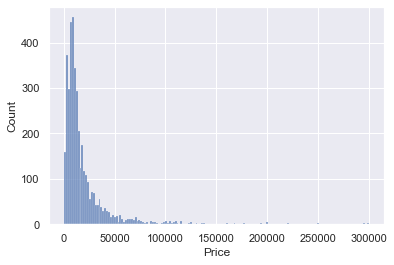

In [186]:
# A great step in the data exploration is to display the probability distribution function (PDF) of a variable
# The PDF will show us how that variable is distributed 
# This makes it very easy to spot anomalies, such as outliers
# The PDF is often the basis on which we decide whether we want to transform a feature
sns.histplot(data_no_mv['Price'])

### Dealing with outliers

In [264]:
# Obviously there are some outliers present 

#I will deal with the problem easily by removing 0.5%, or 1% of the problematic samples
# Here, the outliers are situated around the higher prices (right side of the graph)
# Logic should also be applied
# This is a dataset about used cars, therefore one can imagine how $300,000 is an excessive price

# Outliers are a great issue for OLS, thus we must deal with them in some way

# I will declare a variable that will be equal to the 95th percentile of the 'Price' variable
q = data_no_mv['Price'].quantile(0.99)
# Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'Price'
data_1 = data_no_mv[data_no_mv['Price']<q]
# In this way we have essentially removed the top 1% of the data about 'Price'
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3984,3984.00,3984,3984.00,3984.00,3984,3984,3984.00,3984
unique,7,NaN,6,NaN,NaN,4,2,NaN,302
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN,188
mean,NaN,17837.12,NaN,165.12,2.74,NaN,NaN,2006.29,NaN
std,NaN,18976.27,NaN,102.77,4.96,NaN,NaN,6.67,NaN
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00,NaN
25%,NaN,6980.00,NaN,93.00,1.80,NaN,NaN,2002.75,NaN
50%,NaN,11400.00,NaN,160.00,2.20,NaN,NaN,2007.00,NaN
75%,NaN,21000.00,NaN,230.00,3.00,NaN,NaN,2011.00,NaN


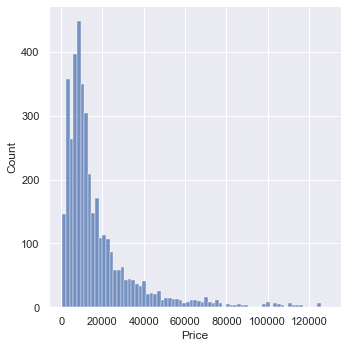

In [265]:
# We can check the PDF once again to ensure that the result is still distributed in the same way overall
# however, there are much fewer outliers
sns.displot(data_1['Price'])

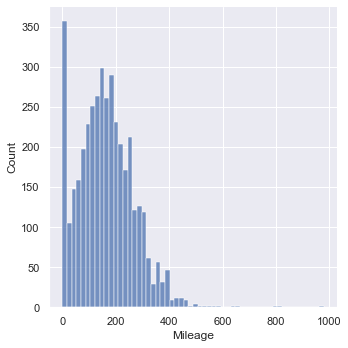

In [266]:
# I will treat the other numerical variables in a similar way
sns.displot(data_no_mv['Mileage'])

In [267]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

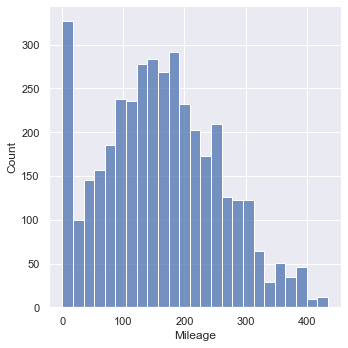

In [268]:
# This plot looks kind of normal, doesn't it?
sns.displot(data_2['Mileage'])

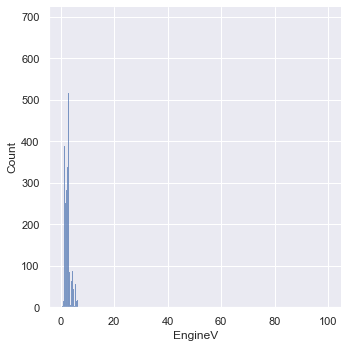

In [269]:
# The situation with engine volume is very strange
# In such cases it makes sense to manually check what may be causing the problem
# In our case the issue comes from the fact that most missing values are indicated with 99.99 or 99
# There are also some incorrect entries like 75
sns.displot(data_no_mv['EngineV'])

In [270]:
# Car engine volumes are usually (always?) below 6.5l so values higher than this are not realistic so they can be removed
data_3 = data_2[data_2['EngineV']<6.0]

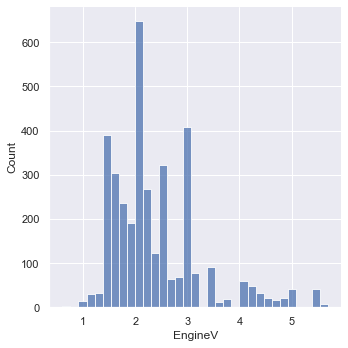

In [200]:
# Following this graph, we realize we can actually treat EngineV as a categorical variable
sns.displot(data_3['EngineV'])

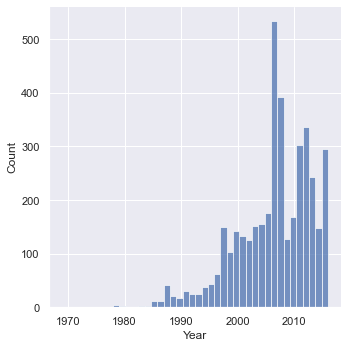

In [271]:
# Finally, the situation with 'Year' is similar to 'Price' and 'Mileage'
# However, the outliers are on the low end
sns.displot(data_no_mv['Year'])

In [273]:
# I'll simply remove them
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

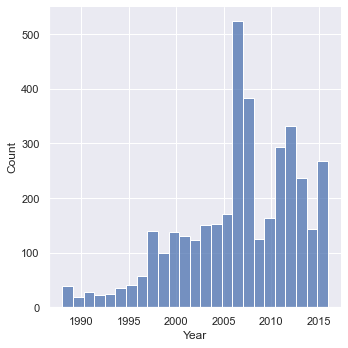

In [274]:
# Here's the new result
sns.displot(data_4['Year'])

In [285]:
# When one remove observations, the original indexes are preserved
# If I remove observations with indexes 2 and 3, the indexes will go as: 0,1,4,5,6
# That's very problematic as one tend to forget about it.
# Finally, once one reset the index, a new column will be created containing the old index (just in case)
# I won't be needing it, thus 'drop=True' to completely forget about it
data_cleaned = data_4.reset_index(drop=True)

In [286]:
# Let's see what's left
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3840,3840.00,3840,3840.00,3840.00,3840,3840,3840.00,3840
unique,7,NaN,6,NaN,NaN,4,2,NaN,286
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,848,NaN,1451,NaN,NaN,1806,3478,NaN,181
mean,NaN,18028.97,NaN,160.86,2.42,NaN,NaN,2006.70,NaN
std,NaN,18963.89,NaN,95.74,0.90,NaN,NaN,6.12,NaN
min,NaN,800.00,NaN,0.00,0.60,NaN,NaN,1988.00,NaN
25%,NaN,7200.00,NaN,92.00,1.80,NaN,NaN,2003.00,NaN
50%,NaN,11525.00,NaN,157.50,2.20,NaN,NaN,2008.00,NaN
75%,NaN,21500.00,NaN,226.00,3.00,NaN,NaN,2012.00,NaN


## Checking the OLS assumptions

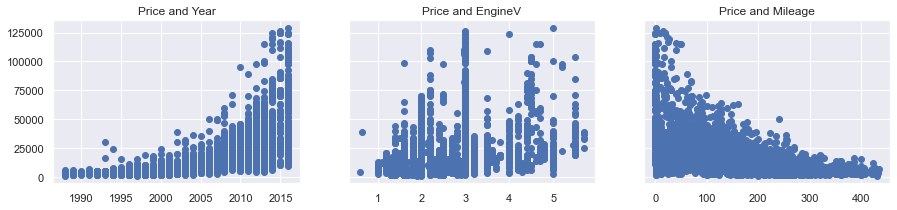

In [287]:
#since Price is the 'y' axis of all the plots, it made sense to plot them side-by-side (so one can compare them)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

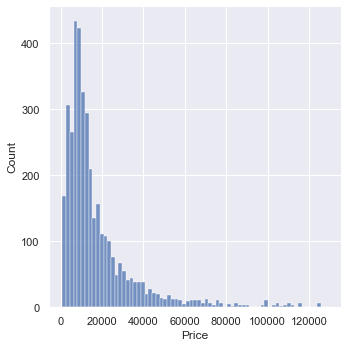

In [288]:
sns.displot(data_cleaned['Price'])

# From the subplots and the PDF of price, one can easily determine that 'Price' is exponentially distributed
# A good transformation in that case is a log transformation so I will perform this transformation


### Relaxing the assumptions

In [289]:
# Let's transform 'Price' with a log transformation
log_price = np.log(data_cleaned['Price'])

# Then we add it to our data frame
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_price
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,320,8.34
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,Sprinter 212,8.97
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,S 500,9.50
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,Q7,10.04
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,Rav 4,9.81
...,...,...,...,...,...,...,...,...,...,...
3835,Volkswagen,11500.00,van,163,2.50,Diesel,yes,2008,T5 (Transporter),9.35
3836,Toyota,17900.00,sedan,35,1.60,Petrol,yes,2014,Corolla,9.79
3837,Mercedes-Benz,125000.00,sedan,9,3.00,Diesel,yes,2014,S 350,11.74
3838,BMW,6500.00,sedan,1,3.50,Petrol,yes,1999,535,8.78


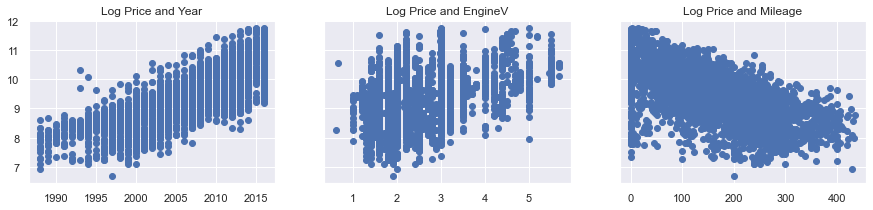

In [290]:
# Let's check the three scatters once again
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')

plt.show()

# The relationships show a clear linear relationship
# This is some good linear regression material

# Alternatively we could have transformed each of the independent variables

In [291]:
# Since I will be using the log price variable, I can drop the old 'Price' one
data_cleaned = data_cleaned.drop(['Price'],axis=1)

### Multicollinearity

In [292]:
# Let's quickly see the columns of our data frame
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model', 'log_price'], dtype=object)

In [293]:
# sklearn does not have a built-in way to check for multicollinearity
# one of the main reasons is that this is an issue well covered in statistical frameworks and not in ML ones
# surely it is an issue nonetheless, thus I will try to deal with it

# Here's the relevant module
# full documentation: http://www.statsmodels.org/dev/_modules/statsmodels/stats/outliers_influence.html#variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To make this as easy as possible to use, I will declare a variable where I put
# all features where I want to check for multicollinearity
# since my categorical data is not yet preprocessed, I will only take the numerical ones
variables = data_cleaned[['Mileage','Year','EngineV']]

# I will create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# here I will make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns

In [294]:
# Let's explore the result
vif

,VIF,Features
0,3.80,Mileage
1,10.82,Year
2,8.26,EngineV


In [295]:
# Since Year and EngineV have high VIF, I will remove them from the model
# This will drive the VIF of other variables down!!! 
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)
#data_no_multicollinearity = data_cleaned.drop(['EngineV'],axis=1)
data_no_multicollinearity

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Model,log_price
0,BMW,sedan,277,2.00,Petrol,yes,320,8.34
1,Mercedes-Benz,van,427,2.90,Diesel,yes,Sprinter 212,8.97
2,Mercedes-Benz,sedan,358,5.00,Gas,yes,S 500,9.50
3,Audi,crossover,240,4.20,Petrol,yes,Q7,10.04
4,Toyota,crossover,120,2.00,Petrol,yes,Rav 4,9.81
...,...,...,...,...,...,...,...,...
3835,Volkswagen,van,163,2.50,Diesel,yes,T5 (Transporter),9.35
3836,Toyota,sedan,35,1.60,Petrol,yes,Corolla,9.79
3837,Mercedes-Benz,sedan,9,3.00,Diesel,yes,S 350,11.74
3838,BMW,sedan,1,3.50,Petrol,yes,535,8.78


## Create dummy variables

In [296]:
# To include the categorical data in the regression, let's create dummies For N input N-1 dummies must be used
# There is a very convenient method called: 'get_dummies' which does that seemlessly
# It is extremely important that we drop one of the dummies, alternatively we will introduce multicollinearity i.e No dummie fro
#audi

data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [297]:
# Here's the result
#data_with_dummies.head()
data_with_dummies

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,277,2.00,8.34,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,427,2.90,8.97,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,358,5.00,9.50,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,240,4.20,10.04,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,120,2.00,9.81,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3835,163,2.50,9.35,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3836,35,1.60,9.79,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3837,9,3.00,11.74,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3838,1,3.50,8.78,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Rearrange a bit

In [298]:
# To make our data frame more organized, I prefer to place the dependent variable in the beginning of the df
# Since each problem is different, that must be done manually
# One can display all possible features and then choose the desired order
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_100', 'Model_11', 'Model_116', 'Model_118', 'Model_120',
       'Model_19', 'Model_190', 'Model_200', 'Model_210', 'Model_220',
       'Model_230', 'Model_25', 'Model_250', 'Model_300', 'Model_316',
       'Model_318', 'Model_320', 'Model_323', 'Model_325', 'Model_328',
       'Model_330', 'Model_335', 'Model_4 Series Gran Coupe', 'Model_428',
       'Model_4Runner', 'Model_5 Series', 'Model_5 Series GT',
       'Model_520', 'Model_523', 'Model_524', 'Model_525', 'Model_528',
       'Model_530', 'Model_535', 'Model_540', 'Model_545', 'Model_550',
       'Model_6 Series Gran Coupe', 'Model_630', 'Model_640', 'Model_645',
       'Model_650', 'Model_73

In [299]:
#I want to make a copy to data_preprocessed
data_preprocessed = data_with_dummies.copy()
data_preprocessed.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,277,2.00,8.34,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,427,2.90,8.97,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,358,5.00,9.50,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,240,4.20,10.04,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,120,2.00,9.81,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Linear regression model

### Declare the inputs and the targets

In [300]:
# The target(s) (dependent variable) is 'log price'
targets = data_preprocessed['log_price']

# The inputs are everything BUT the dependent variable, so we can simply drop it
inputs = data_preprocessed.drop(['log_price'],axis=1)
inputs

,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,277,2.00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,427,2.90,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,358,5.00,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,240,4.20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,120,2.00,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3835,163,2.50,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3836,35,1.60,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3837,9,3.00,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3838,1,3.50,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Scale the data

In [301]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

StandardScaler()

In [302]:
# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)
#inputs_scaled

### Train Test Split

In [303]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split i.e test_size=0.2, and some random state so it doesn't change everytime.
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### Create the regression

In [304]:
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression()

In [305]:
# Let's check the outputs of the regression
# I'll store them in y_hat as this is the 'theoretical' name of the predictions
y_hat = reg.predict(x_train)

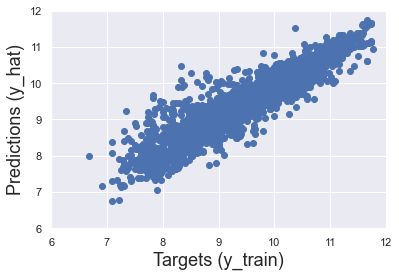

In [324]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
# Sometimes the plot will have different scales of the x-axis and the y-axis
# This is an issue as we won't be able to interpret the '45-degree line'
# We want the x-axis and the y-axis to be the same
plt.xlim(6,12)
plt.ylim(6,12)
plt.show()


Text(0.5, 1.0, 'Residuals PDF')

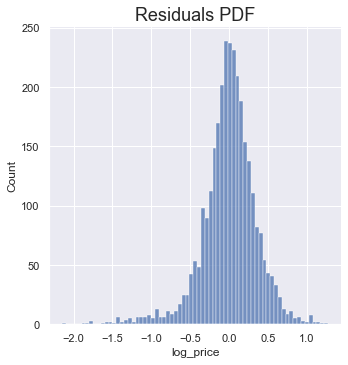

In [307]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
sns.displot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)

# In the best case scenario this plot should be normally distributed
# In our case we notice that there are many negative residuals (far away from the mean)
# Given the definition of the residuals (y_train - y_hat), negative values imply
# that y_hat (predictions) are much higher than y_train (the targets)
# This is food for thought to improve our model
#A perfect model takes a long time to be achieved

In [308]:
# Find the R-squared of the model
reg.score(x_train,y_train)

#0.84 implies the result explain 84% of the variability of the data, one should strive to do better

0.8363801403255011

### Finding the weights and bias

In [311]:
# Obtain the bias (intercept) of the regression
reg.intercept_

-47214802653.619026

In [310]:
# Obtain the weights (coefficients) of the regression
reg.coef_

# Note that they are barely interpretable if at all

array([-3.59951629e-01, -7.58057695e-03, -5.74650649e+11, -6.13606796e+11,
        1.01300478e+13, -2.34839968e+13,  2.79637932e+12, -4.08989495e+12,
       -4.77102112e-02,  2.44140625e-04, -2.44140625e-02, -4.10156250e-02,
       -2.44140625e-02, -1.08886719e-01, -2.44140625e-02, -1.40625000e-01,
        3.06640625e-01, -9.72919793e+10,  1.17402727e+12,  3.66821289e-02,
        4.06036377e-02, -8.42285156e-03,  1.66010902e+12,  1.19018555e-02,
        2.61230469e-02,  1.14746094e-02,  2.57568359e-02,  5.67626953e-03,
        1.17402727e+12,  1.19628906e-02,  1.77001953e-03,  1.51977539e-02,
        5.79833984e-02,  9.09423828e-02,  5.24902344e-03,  4.01611328e-02,
        2.22167969e-02,  5.12695312e-02,  2.81982422e-02, -3.22930507e+12,
        2.64282227e-02, -1.59470084e+11,  2.27050781e-02,  4.62646484e-02,
        1.55273438e-01,  4.76074219e-02, -1.07154093e+12,  6.37207031e-02,
        6.61621094e-02,  1.06689453e-01,  6.20117188e-02,  3.10058594e-02,
        2.19726562e-02,  

In [312]:
# Create a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary
#+ve weight implies that as the feature increases in value so is the log price and Price
#-ve weight implies that as the feature increases in value, the log price and Price decrease

#For the dummies, 
#+ weight means that the Brand is more expensive than the benchmark (Audi in this case)
#- weight means that the Brand is more expensive than the benchmark (Audi in this case)

,Features,Weights
0,Mileage,-0.36
1,EngineV,-0.01
2,Brand_BMW,-574650649005.11
3,Brand_Mercedes-Benz,-613606796147.13
4,Brand_Mitsubishi,10130047750582.05
5,Brand_Renault,-23483996825663.50
6,Brand_Toyota,2796379316972.00
7,Brand_Volkswagen,-4089894953879.54
8,Body_hatch,-0.05
9,Body_other,0.00


In [313]:
# Check the different categories in the 'Brand' variable
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

## Testing

In [314]:
# Once we have trained and fine-tuned our model, we can proceed to testing it
# Testing is done on a dataset that the algorithm has never seen
# Luckily we have prepared such a dataset
# Our test inputs are 'x_test', while the outputs: 'y_test' 
# We SHOULD NOT TRAIN THE MODEL ON THEM, we just feed them and find the predictions
# If the predictions are far off, we will know that our model overfitted
y_hat_test = reg.predict(x_test)

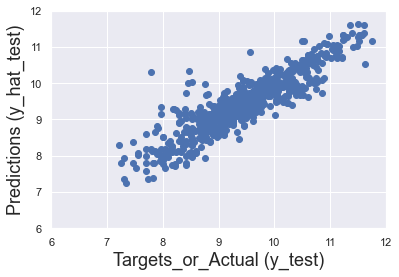

<Figure size 432x288 with 0 Axes>

In [325]:
# Create a scatter plot with the test targets and the test predictions
# You can include the argument 'alpha' which will introduce opacity to the graph
#plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.scatter(y_test, y_hat_test)
plt.xlabel('Targets_or_Actual (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,12)
plt.ylim(6,12)
plt.show()
plt.savefig('Prediction_vs_Actual')

In [316]:
# Finally, let's manually check these predictions i.e check the dataframe_performance
# To obtain the actual prices, we take the exponential of the log_price
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

<ipython-input-316-e59f942f2006>:3: RuntimeWarning: overflow encountered in exp
  df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])


,Prediction
0,12094.49
1,3158.12
2,13026.28
3,17575.91
4,9832.75


In [317]:
# We can also include the test targets in that data frame (so we can manually compare them)
df_pf['Target'] = np.exp(y_test)
df_pf

# Note that we have a lot of missing values
# There is no reason to have ANY missing values, though
# This suggests that something is wrong with the data frame / indexing

,Prediction,Target
0,12094.49,NaN
1,3158.12,7900.00
2,13026.28,NaN
3,17575.91,NaN
4,9832.75,NaN
5,9795.61,14200.00
6,21698.05,NaN
7,7657.75,NaN
8,20585.98,11950.00
9,16797.68,NaN


In [318]:
# After displaying y_test, we find what the issue is
# The old indexes are preserved (recall earlier in that code we made a note on that)
# The code was: data_cleaned = data_4.reset_index(drop=True)

# Therefore, to get a proper result, we must reset the index and drop the old indexing
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0   9.08
1   8.56
2   9.80
3   9.66
4   9.17
Name: log_price, dtype: float64

In [96]:
# Let's overwrite the 'Target' column with the appropriate values
# Again, we need the exponential of the test log price
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,10381.10,2300.00
1,inf,2800.00
2,4823.53,2500.00
3,7184.63,6400.00
4,11401.40,9150.00
5,0.00,20000.00
6,inf,38888.00
7,12496.03,16999.00
8,12144.14,12500.00
9,41653.72,41000.00


In [320]:
# Additionally, we can calculate the difference between the targets and the predictions
# Note that this is actually the residual (we already plotted the residuals)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

# Since OLS is basically an algorithm which minimizes the total sum of squared errors (residuals),
# this comparison makes a lot of sense

In [321]:
# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,12094.49,NaN,NaN,NaN
1,3158.12,7900.00,4741.88,60.02
2,13026.28,NaN,NaN,NaN
3,17575.91,NaN,NaN,NaN
4,9832.75,NaN,NaN,NaN
5,9795.61,14200.00,4404.39,31.02
6,21698.05,NaN,NaN,NaN
7,7657.75,NaN,NaN,NaN
8,20585.98,11950.00,-8635.98,72.27
9,16797.68,NaN,NaN,NaN


In [322]:
# Exploring the descriptives here gives us additional insights
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,768.00,159.00,159.00,159.00
mean,inf,15214.45,-inf,inf
std,NaN,15543.24,NaN,NaN
min,0.00,1400.00,-inf,0.37
25%,7900.84,6500.00,-9998.07,32.69
50%,12333.03,10400.00,-1437.42,72.63
75%,20407.17,17500.00,5426.30,141.99
max,inf,109999.00,94725.06,inf


In [323]:
# Sometimes it is useful to check these outputs manually
# To see all rows, we use the relevant pandas syntax
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
665,15442.67,15500.00,57.33,0.37
476,9909.87,10000.00,90.13,0.90
404,10375.32,10250.00,-125.32,1.22
233,17156.19,16900.00,-256.19,1.52
381,25454.45,24999.00,-455.45,1.82
544,3183.66,3100.00,-83.66,2.70
109,12333.03,12700.00,366.97,2.89
357,28840.15,29900.00,1059.85,3.54
311,19452.38,20500.00,1047.62,5.11
237,17625.32,18800.00,1174.68,6.25


In [ ]:
#The model did very good in the upper part but not so good in the lower part as shown in the differences so one should think of other ways to improve it
#by using different sets of variables
#removing a larger portion of the Outliers
#or use different kinds of transformation